In [1]:

import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt
plt.rc('font', family='D2Coding')

cancer = load_breast_cancer()

#tip1. 
# split 하기 전에 가능하면 데이터의 분포를 확인
# stratify=cancer.target 
# => 데이터 편향되어 있을 경우, 비율에 맞춰서 데이터 셔플링을 하지 않으면, 답안이 과하게 몰려 있을 수 있음
# 이것을 사용하면 과접합의 가능성은 있으나 너무 편향되어 있을 경우 그렇다.

unique, counts = np.unique(cancer.target, return_counts=True)
for i, (val, count) in enumerate(zip(unique, counts)):
    print(f"{cancer.target_names[val]}: {count/len(cancer.target)}")



malignant: 0.37258347978910367
benign: 0.6274165202108963


In [2]:
# 이렇게 나눈 후 스케일을 옮겨야 함.
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)


### load_bareast_cancer()와 나이브 베이즈를 사용해서 최적의 스케일러는?
* minMax는 SVM과 가장 많이 사용함. 
* 1 x 1에 n차 다항방정식을 응축해서 집어 넣고 n차 방적식으로 갈 때, 
* 공간을 사용하는 애들을 쓸 때 minmax를 쓴다.



In [3]:
scalers = {
    "None" : None,
    "StandardScaler" : StandardScaler(),
    "MinMaxScaler" : MinMaxScaler()
}

In [4]:
scaling_results ={}
for name, scaler in scalers.items():
    if scaler is not None:
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
    else:
        X_train_scaled = X_train
        X_test_scaled = X_test

gnb = GaussianNB()
gnb.fit(X_train_scaled, y_train)

y_pred = gnb.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)

scaling_results[name] = {"accuracy" : accuracy}



In [12]:
scaling_results


{'MinMaxScaler': {'accuracy': 0.9370629370629371}}

# KNN과 StandardScaler

In [5]:
# KNN에 Standard를 사용해서 스케일 조정 후에 학습을 진행하세요.
# 1. 데이터 => cancer 데이터
# 2. 나누기 => train/test
# 3. 스케일 => Standard
# 4. 학습 => fit, predict
# 5. 검증 => score..

In [6]:
#StandardScaler 스케일러 적용
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [7]:
training_accuracy=[]
test_accuracy =[]
neighbors_settings = range(2, 31)

In [8]:
for n_neighbors in neighbors_settings:
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train_scaled, y_train)
    
    train_acc = knn.score(X_train_scaled, y_train)
    test_acc = knn.score(X_test_scaled, y_test)
    
    training_accuracy.append(train_acc)
    test_accuracy.append(test_acc)

In [9]:
best_k = neighbors_settings[np.argmax(test_accuracy)]
best_test_accuracy = max(test_accuracy)
best_k, best_test_accuracy ## knn에 홀수 나오면 폐기

(5, 0.9790209790209791)

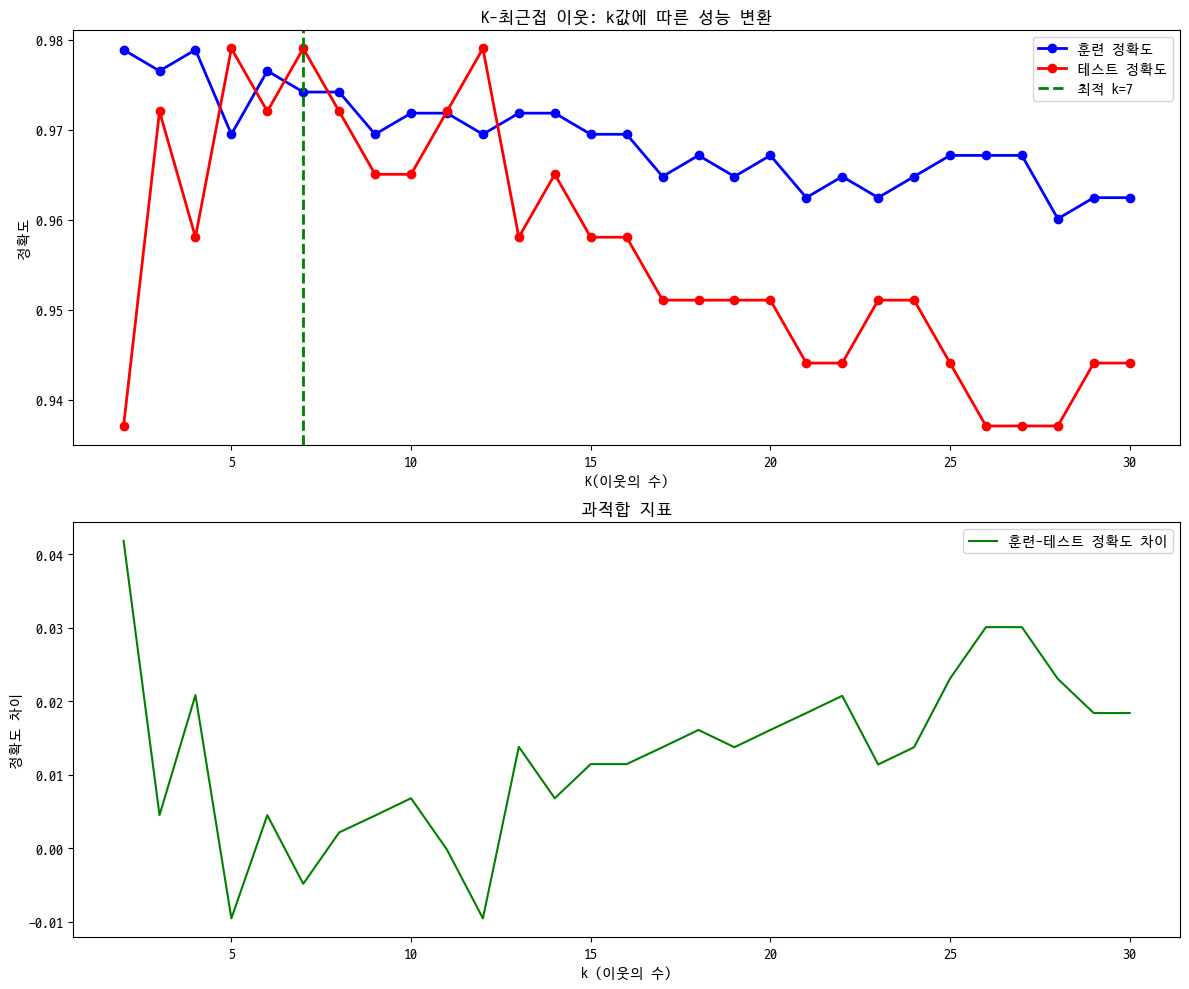

In [10]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

ax1.plot(neighbors_settings, training_accuracy, "-o", label="훈련 정확도", linewidth=2, markersize=6, color="blue")
ax1.plot(neighbors_settings, test_accuracy, "-o", label="테스트 정확도", linewidth=2, markersize=6, color="red")
ax1.axvline(x=neighbors_settings[best_k], color="green", linestyle="--", linewidth=2, label=f"최적 k={neighbors_settings[best_k]}")
ax1.set_ylabel("정확도")
ax1.set_xlabel("K(이웃의 수)")
ax1.set_title("K-최근접 이웃: k값에 따른 성능 변환")
ax1.legend()

# 정확도 차이
accuracy_diff = np.array(training_accuracy) - np.array(test_accuracy) # 판다스 못 쓸 때
ax2.plot(neighbors_settings, accuracy_diff, color="green", label="훈련-테스트 정확도 차이")
ax2.set_ylabel('정확도 차이')
ax2.set_xlabel('k (이웃의 수)')
ax2.set_title("과적합 지표")
ax2.legend()
plt.tight_layout()
plt.show()

In [11]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)


y_pred = knn.predict(X_test_scaled)

print("훈련 세트 정확도:", knn.score(X_train_scaled, y_train))
print("테스트 세트 정확도:", knn.score(X_test_scaled, y_test))
print("예측 정확도 (수동 계산):", np.mean(y_pred == y_test))

훈련 세트 정확도: 0.9694835680751174
테스트 세트 정확도: 0.9790209790209791
예측 정확도 (수동 계산): 0.9790209790209791
